You need to make a copy to your own Google drive if you want to edit the original notebook! Start by opening this notebook on Colab 👇

<a href="https://colab.research.google.com/github/PJalgotrader/platforms-and-tools/blob/main/Python_Crash_course_2020/7-Timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> 



![logo](https://upload.wikimedia.org/wikipedia/commons/4/44/Huntsman-Wordmark-with-USU-Blue.gif#center) 



## 🔗 Links

[![linkedin](https://img.shields.io/badge/LinkedIn-0A66C2?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/pedram-jahangiry-cfa-5778015a)

[![Youtube](https://img.shields.io/badge/youtube_channel-1DA1F2?style=for-the-badge&logo=youtube&logoColor=white&color=FF0000)](https://www.youtube.com/channel/UCNDElcuuyX-2pSatVBDpJJQ)

[![Twitter URL](https://img.shields.io/twitter/url/https/twitter.com/PedramJahangiry.svg?style=social&label=Follow%20%40PedramJahangiry)](https://twitter.com/PedramJahangiry)


---

# Time series with Pandas in Python

In this section we are going to learn how to handle time series data in Python:

Basic topics to be covered:

* datetime module
* numpy datetime arrays
* pandas datetime
* pandas datareader
    1. Resampling
    2. Time shifting (leads and lags)
    3. Rolling windows and Expanding windows
   

#### datetime module

In [1]:
from datetime import datetime

In [2]:
year =2021
month= 1
day =1

In [3]:
my_date = datetime(year, month, day)
my_date

datetime.datetime(2021, 1, 1, 0, 0)

In [4]:
# we can extract any information from our datetime object. 
my_date.month

1

In [5]:
my_date.isoweekday()
# Monday == 1 ... Sunday == 7 so 5 means Friday

5

#### Numpy datetime arrays
NumPy handles dates more efficiently than Python's datetime format.
The NumPy data type is called datetime64 to distinguish it from Python's datetime.


In [6]:
import numpy as np

In [7]:
# creating datetime array
np.array(['2020-01-20', '2021-01-20'], dtype='datetime64')

array(['2020-01-20', '2021-01-20'], dtype='datetime64[D]')

In [8]:
np.array(['2020-01-20', '2021-01-20'], dtype='datetime64[Y]')

array(['2020', '2021'], dtype='datetime64[Y]')

In [9]:
# np.arange(start, stop, step)
np.arange('2021-01-01', '2021-01-10', dtype='datetime64[D]')

array(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
       '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
       '2021-01-09'], dtype='datetime64[D]')

#### Pandas datetime
Usually we will work with time series as a datetime index in pandas dataframes. pandas has a lot of built in functions and methods to work with time series!

In [10]:
import pandas as pd

In [11]:
# let's creat an index first. For example the first week of 2021
index = pd.date_range('2020-01-01', periods=7, freq='D')
index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07'],
              dtype='datetime64[ns]', freq='D')

here is a list of frequency parameters: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

In [12]:
# if you want to create an index for specific days, there are two ways to do that:
custom_index = pd.to_datetime(['2021-01-06', '2021-01-21'])
custom_index

DatetimeIndex(['2021-01-06', '2021-01-21'], dtype='datetime64[ns]', freq=None)

In [13]:
# or alternatively, we could pass a numpy array to pd.DatetimeIndex()
custom_index = pd.DatetimeIndex(np.array(['2021-01-01', '2021-01-19']))
custom_index 

DatetimeIndex(['2021-01-01', '2021-01-19'], dtype='datetime64[ns]', freq=None)

Now let's explore some of pandas datetime functions:

In [14]:
# creating a time series data frame
# pd.DateFrame( data, index, column names)
df = pd.DataFrame(data=['first day of the year', 'first day of school'],index= custom_index, columns= ['Event'])
df

,Event
2021-01-01,first day of the year
2021-01-19,first day of school


In [15]:
df.columns

Index(['Event'], dtype='object')

In [16]:
df.index

DatetimeIndex(['2021-01-01', '2021-01-19'], dtype='datetime64[ns]', freq=None)

In [17]:
df.index.max()

Timestamp('2021-01-19 00:00:00')

In [18]:
df.index.argmax()

1

#### Pandas datareader

In [19]:
import pandas_datareader.data as web

In [20]:
start = pd.to_datetime('2021-01-01')
end   = pd.to_datetime('today')

In [21]:
Ticker =  "TSLA AAPL".split(" ")
Ticker

['TSLA', 'AAPL']

In [23]:
Stocks = web.DataReader(name= Ticker, data_source= 'yahoo', start=start, end= end)
Stocks.tail()

TypeError: string indices must be integers

In [25]:
# if pandas_datareader didn't work, try yfinance. 
# !pip install yfinance


     ---------------------------------------- 50.4/50.4 kB 1.3 MB/s eta 0:00:00
  Using cached appdirs-1.4.4-py2.py3-none-any.whl (9.6 kB)
     -------------------------------------- 112.2/112.2 kB 3.3 MB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 14.2 MB/s eta 0:00:00


In [27]:
import yfinance as yf

In [28]:
Stocks = yf.download(Ticker, start, end)
Stocks.tail()

[*********************100%***********************]  2 of 2 completed


Adj Close                   Close                    High  \
                  AAPL        TSLA        AAPL        TSLA        AAPL   
Date                                                                     
2023-01-06  129.619995  113.059998  129.619995  113.059998  130.289993   
2023-01-09  130.149994  119.769997  130.149994  119.769997  133.410004   
2023-01-10  130.729996  118.849998  130.729996  118.849998  131.259995   
2023-01-11  133.490005  123.220001  133.490005  123.220001  133.509995   
2023-01-12  133.410004  123.559998  133.410004  123.559998  134.259995   

                               Low                    Open              \
                  TSLA        AAPL        TSLA        AAPL        TSLA   
Date                                                                     
2023-01-06  114.389999  124.889999  101.809998  126.010002  103.000000   
2023-01-09  123.519997  129.889999  117.110001  130.470001  118.959999   
2023-01-10  122.760002  128.119995  114.919998  130.259995  121.070000   
2023-01-11  125.949997  130.460007  120.510002  131.250000  122.089996   
2023-01-12  124.129997  131.440002  117.000000  133.880005  122.559998   

              Volume             
                AAPL       TSLA  
Date                             
2023-01-06  87686600  220575900  
2023-01-09  70790800  190284000  
2023-01-10  63896200  167642500  
2023-01-11  69458900  183810800  
2023-01-12  71326100  169089400

In [29]:
df= round(Stocks['Adj Close'],2)
df.tail()

,AAPL,TSLA
Date,,
2023-01-06,129.62,113.06
2023-01-09,130.15,119.77
2023-01-10,130.73,118.85
2023-01-11,133.49,123.22
2023-01-12,133.41,123.56


In [30]:
import matplotlib.pyplot as plt

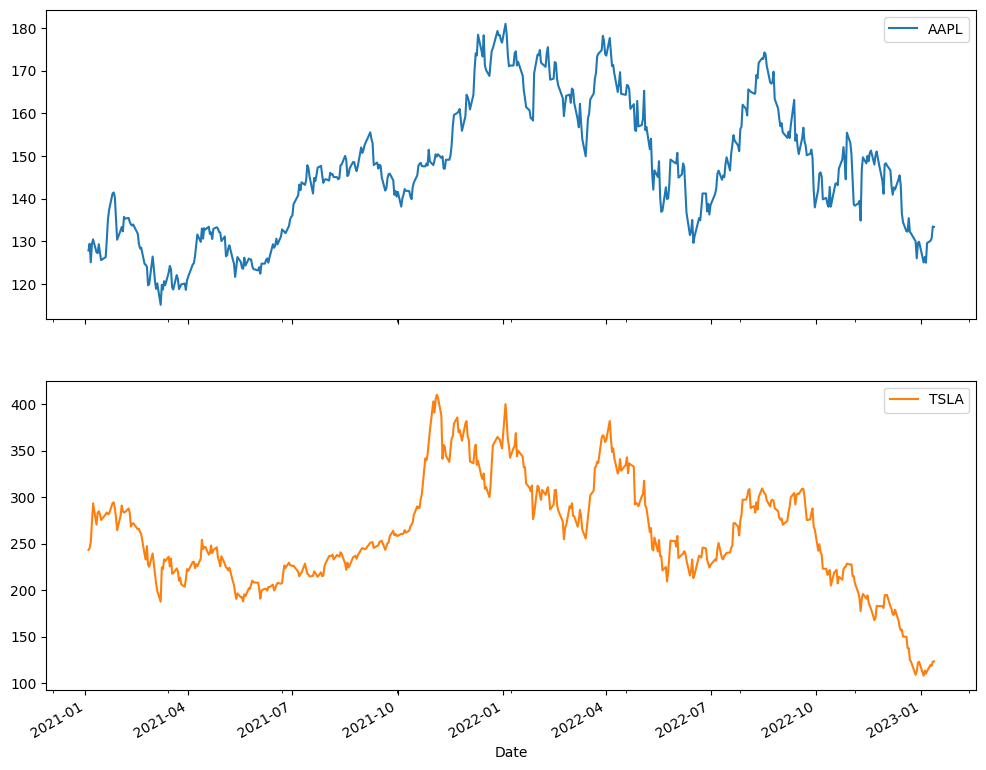

In [31]:
df.plot(subplots=True, figsize=(12,10))
plt.show()

In [32]:
df.index

DatetimeIndex(['2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07',
               '2021-01-08', '2021-01-11', '2021-01-12', '2021-01-13',
               '2021-01-14', '2021-01-15',
               ...
               '2022-12-29', '2022-12-30', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-09', '2023-01-10',
               '2023-01-11', '2023-01-12'],
              dtype='datetime64[ns]', name='Date', length=511, freq=None)

#### 1.Resampling
Resampling data by different rules (frequencies). Here is the list of frequencies: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

In [11]:
# example: resampling data by month end frequency
df.resample(rule='M').mean()

Symbols,TSLA,AAPL
Date,,
2021-01-31,276.258947,131.457368
2021-02-28,264.757368,130.123158
2021-03-31,218.934348,120.604348
2021-04-30,236.539048,130.443333
2021-05-31,205.584000,125.636500
2021-06-30,208.973636,128.826364
2021-07-31,219.711905,143.875714
2021-08-31,235.080455,147.068182
2021-09-30,251.317143,147.236190


you can resample based on custom resampling functions as well

**example 1: plot the normalized monthly average price.**

In [21]:
df.resample(rule='M').mean().apply(lambda x: x/x[0])

Symbols,TSLA,AAPL
Date,,
2021-01-31,1.000000,1.000000
2021-02-28,0.958367,0.989851
2021-03-31,0.792497,0.917441
2021-04-30,0.856222,0.992286
2021-05-31,0.744171,0.955720
2021-06-30,0.756441,0.979986
2021-07-31,0.795311,1.094467
2021-08-31,0.850942,1.118752
2021-09-30,0.909716,1.120030


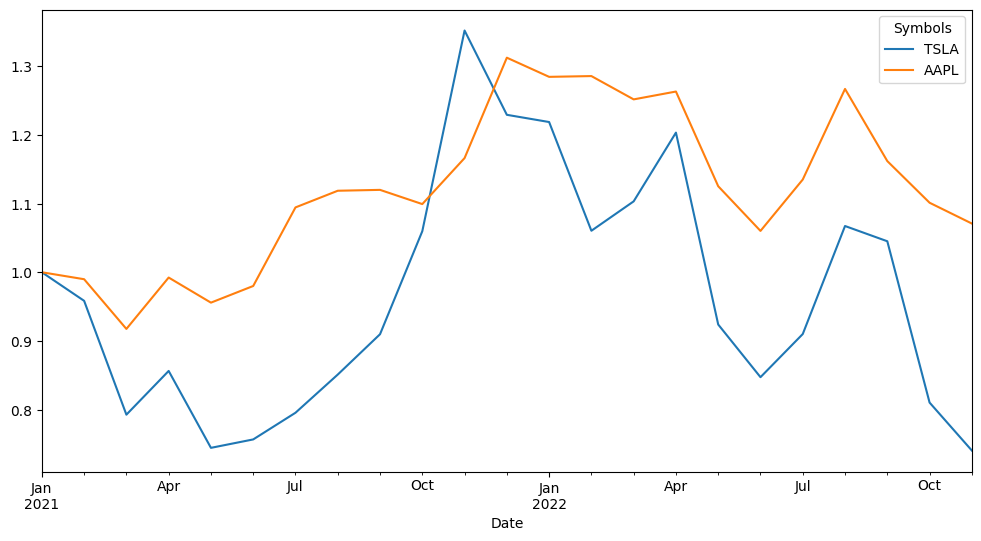

In [18]:
df.resample(rule='M').mean().apply(lambda x: x/x[0]).plot(figsize=(12,6))
plt.show()

In [19]:
# example 2: draw a barplot comparing monthly returns between Tesla and Apple

df.resample(rule='M').apply(lambda x : x[-1]/x[0]-1)

Symbols,TSLA,AAPL
Date,,
2021-01-31,0.087355,0.019708
2021-02-28,-0.195649,-0.094681
2021-03-31,-0.070319,-0.044125
2021-04-30,0.072083,0.068764
2021-05-31,-0.087122,-0.058173
2021-06-30,0.089436,0.102029
2021-07-31,0.013719,0.062537
2021-08-31,0.036693,0.044922
2021-09-30,0.056355,-0.072188


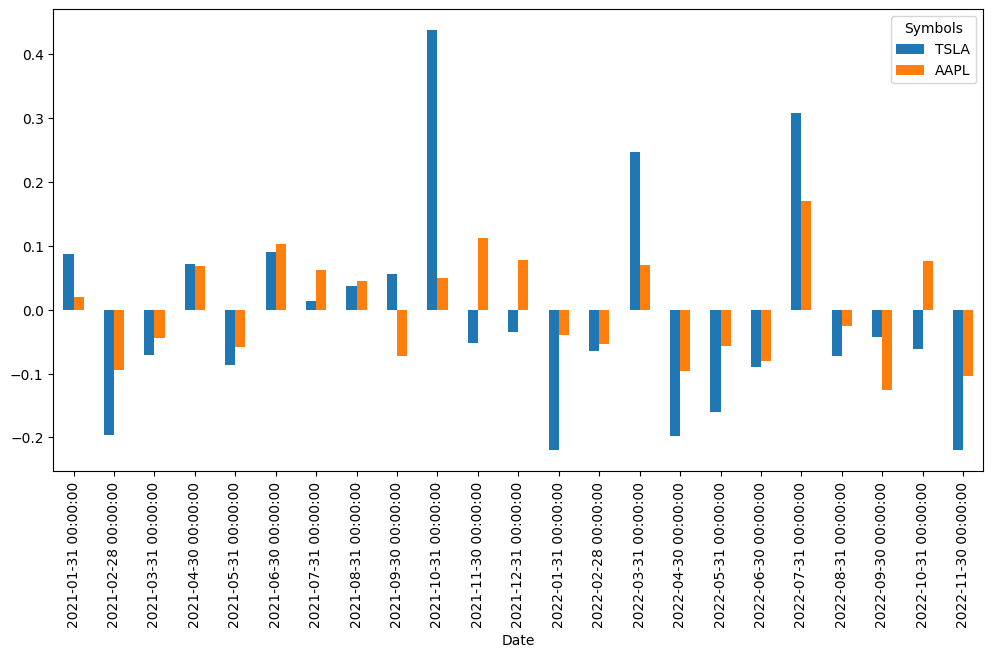

In [22]:
df.resample(rule='M').apply(lambda x : x[-1]/x[0]-1).plot.bar(figsize=(12,6))
plt.show()

#### 2. Time shifting (leads and lags)


In [23]:
# shift forward
df_apple= pd.DataFrame(df['AAPL'])
df_apple.head()

,AAPL
Date,
2021-01-04,127.87
2021-01-05,129.46
2021-01-06,125.10
2021-01-07,129.37
2021-01-08,130.48


In [24]:
df_apple['lag(t-1)']= df_apple['AAPL'].shift(1)
df_apple['lead(t+1)']= df_apple['AAPL'].shift(-1)

df_apple.head()

,AAPL,lag(t-1),lead(t+1)
Date,,,
2021-01-04,127.87,NaN,129.46
2021-01-05,129.46,127.87,125.10
2021-01-06,125.10,129.46,129.37
2021-01-07,129.37,125.10,130.48
2021-01-08,130.48,129.37,127.45


#### 3. Rolling windows and Expanding windows

Let's construct a 30 day simple moving averages for Tesla!

In [25]:
df.head()

Symbols,TSLA,AAPL
Date,,
2021-01-04,243.26,127.87
2021-01-05,245.04,129.46
2021-01-06,251.99,125.10
2021-01-07,272.01,129.37
2021-01-08,293.34,130.48


In [26]:
df.rolling(window=5).mean().head()

Symbols,TSLA,AAPL
Date,,
2021-01-04,NaN,NaN
2021-01-05,NaN,NaN
2021-01-06,NaN,NaN
2021-01-07,NaN,NaN
2021-01-08,261.128,128.456


In [27]:
df['TSLA_MA(30)']=df['TSLA'].rolling(30).mean()

In [28]:
df.head()

Symbols,TSLA,AAPL,TSLA_MA(30)
Date,,,
2021-01-04,243.26,127.87,NaN
2021-01-05,245.04,129.46,NaN
2021-01-06,251.99,125.10,NaN
2021-01-07,272.01,129.37,NaN
2021-01-08,293.34,130.48,NaN


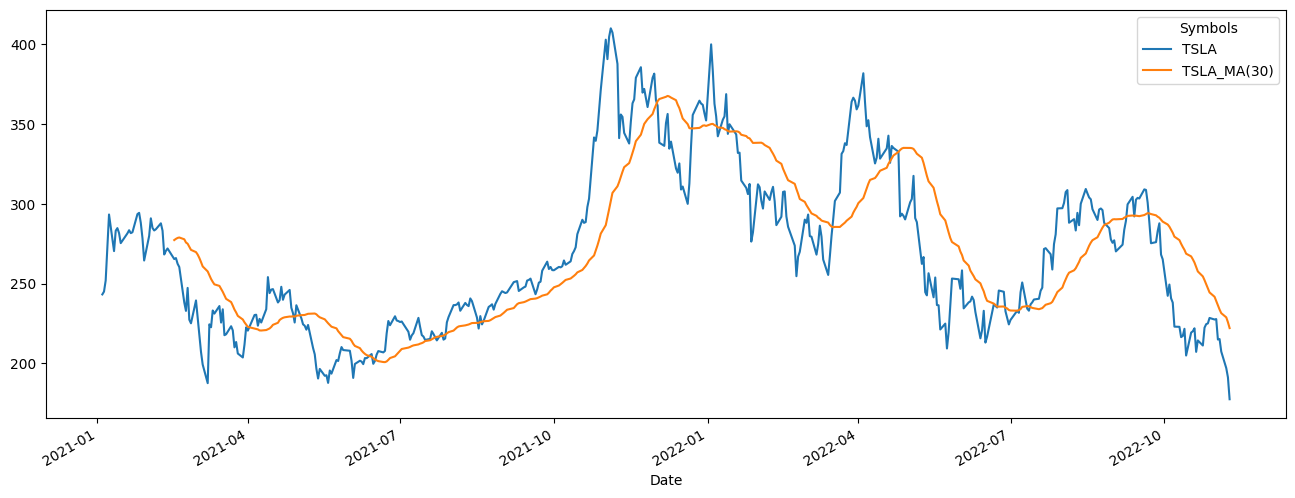

In [29]:
df[['TSLA', 'TSLA_MA(30)']].plot(figsize=(16,6))

plt.show()

Let's construct an expanding averages for AAPL!

In [30]:
df['AAPL'].head()

Date
2021-01-04    127.87
2021-01-05    129.46
2021-01-06    125.10
2021-01-07    129.37
2021-01-08    130.48
Name: AAPL, dtype: float64

In [31]:
df['AAPL'].expanding().mean().head()

Date
2021-01-04    127.870000
2021-01-05    128.665000
2021-01-06    127.476667
2021-01-07    127.950000
2021-01-08    128.456000
Name: AAPL, dtype: float64

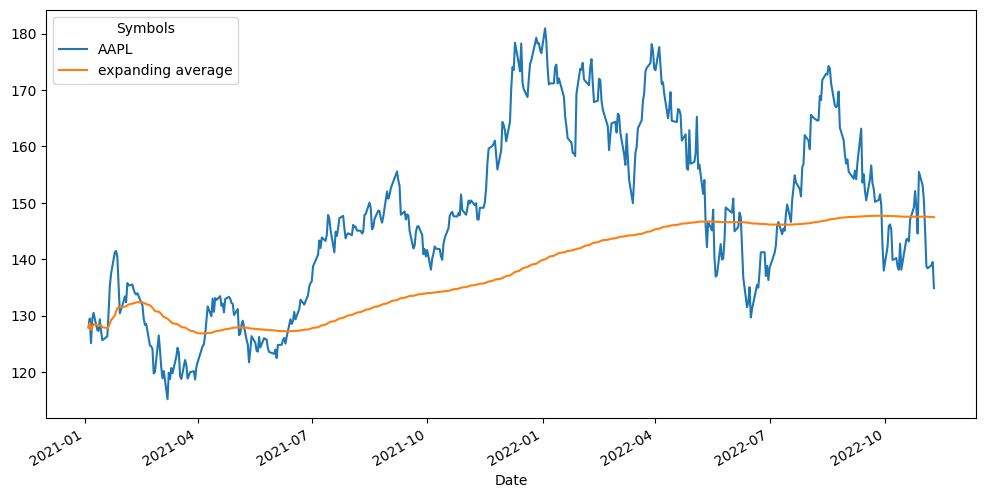

In [32]:
df['expanding average']=df['AAPL'].expanding().mean()
df[['AAPL','expanding average']].plot(figsize=(12,6))

plt.show()